<a href="https://colab.research.google.com/github/nikhilgodalla/ObesityDataScience/blob/main/Model_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
The dataset comprises estimations of obesity levels among individuals in Mexico, Peru, and Colombia, spanning ages from 14 to 61 and encompassing various dietary habits and physical conditions. Data collection was facilitated through a web platform, where anonymous respondents completed a survey. Subsequently, the gathered information underwent processing, resulting in 17 attributes and 2111 records.

The attributes pertaining to dietary habits include the frequency of consuming high-calorie foods (FAVC), vegetable consumption frequency (FCVC), number of main meals (NCP), consumption of snacks between meals (CAEC), daily water intake (CH20), and alcohol consumption (CALC). Attributes concerning physical condition encompass the monitoring of calorie intake (SCC), frequency of physical activity (FAF), time spent using technological devices (TUE), and mode of transportation used (MTRANS).

The variables obtained include gender, age, height, and weight. Obesity levels are categorized as follows:

Underweight: 1
Normal: 2
Overweight: 3
Obesity I:4
Obesity II: 5
Obesity III: 6
The dataset encompasses both numerical and continuous data, making it suitable for analysis for performing predicitions.

Link - https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

# **Importing Libraries**


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# **Loading and Reading Dataset**

In [ ]:
null_values = ['-',np.nan]
obesity_data= pd.read_csv("https://raw.githubusercontent.com/nikhilgodalla/ObesityDataScience/main/ObesityDataSet.csv",na_values=null_values)


In [ ]:
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:

# Define the ordinal mapping for 'NObeyesdad'
ordinal_mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}

# Apply label encoding with specified mapping
obesity_data['NObeyesdad'] = obesity_data['NObeyesdad'].map(ordinal_mapping)

# Perform label encoding for other categorical attributes using one-hot encoding
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
obesity_data = pd.get_dummies(obesity_data, columns=categorical_cols, drop_first=True)


In [ ]:
obesity_data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,2,1,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,3,1,...,0,0,0,0,1,0,0,0,1,0


# **Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Assuming 'NObeyesdad' is your target variable and other columns are features
X = obesity_data.drop(columns=['NObeyesdad'])
y = obesity_data['NObeyesdad']
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Display the coefficients of the logistic regression model
coefficients = pd.DataFrame(log_reg.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients)

Accuracy: 0.8297872340425532
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.89      0.53      0.67        62
           2       0.68      0.79      0.73        56
           3       0.67      0.68      0.67        50
           4       0.90      0.81      0.85        78
           5       0.88      1.00      0.94        58
           6       0.94      1.00      0.97        63

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.82       423
weighted avg       0.84      0.83      0.82       423

                                    Coefficient
Age                                    0.070400
Height                                 7.967583
Weight                                -0.504778
FCVC                                   1.269834
NCP                                    1.113035
CH2O                                   0.574197
FAF                                   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The regression coefficients:

Age: For every one unit increase in age, the log-odds of the target class increase by 0.0704.

Height: A one unit increase in height is associated with an increase of approximately 7.9676 in the log-odds of the target class.

Weight: Each one unit increase in weight results in a decrease of approximately 0.5048 in the log-odds of the target class.

FCVC (Frequency of consumption of vegetables): A one unit increase in FCVC leads to an increase of approximately 1.2698 in the log-odds of the target class.

NCP (Number of main meals): Increasing NCP by one unit increases the log-odds of the target class by approximately 1.1130.

CH2O (Consumption of water): Each one unit increase in CH2O corresponds to an increase of approximately 0.5742 in the log-odds of the target class.

# **Decision Tree Classifier**

Accuracy of Decision Tree Classifier: 0.6335697399527187


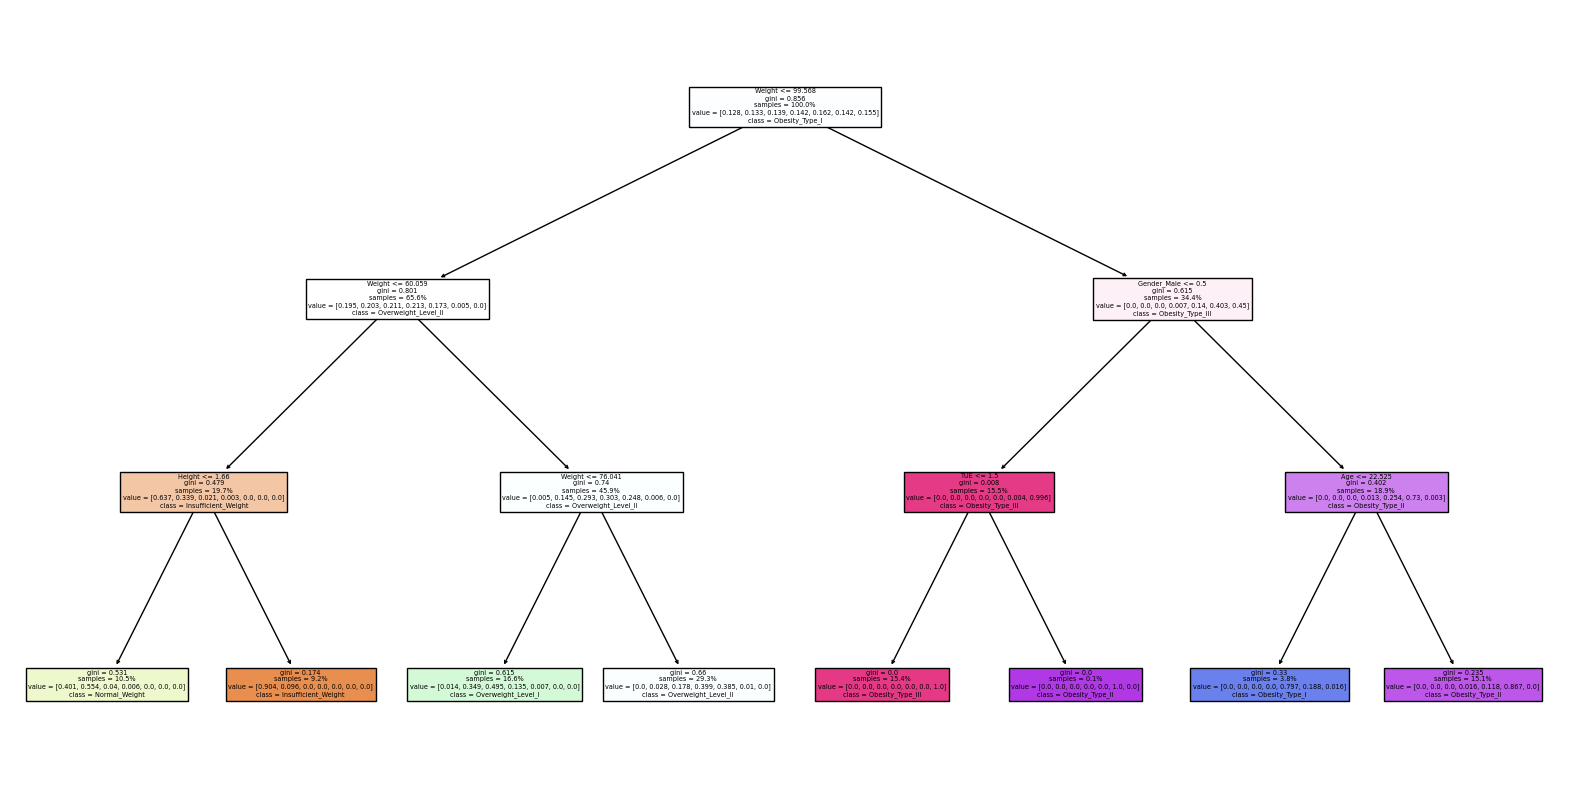

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limiting depth for simplicity

# Fit the model
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy of Decision Tree Classifier: {accuracy_dt}')

# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], proportion=True)
plt.show()


Root Node: This is the top-most node from which the tree starts. In your case, it's split based on the 'Weight' feature at a value of ≈80.953, separating the samples into two groups depending on whether their weight is less than or greater than this value. The samples attribute indicates the number of samples at that node, the value attribute gives the distribution of the samples across different classes, and the class attribute indicates the most prevalent class at that node.

Intermediate Nodes: These are the nodes that further split the data into subgroups. For instance, one of the intermediate nodes uses 'Height' as the splitting feature at a value of ≈1.75m, again partitioning the samples into two branches.

Leaf Nodes: These are the final nodes that do not split any further, representing the decision outcomes. Each leaf node provides a class prediction based on the paths taken to reach that node. For example, a leaf node in your tree predicts the class 'Normal_Weight' for samples that end up there, based on the conditions from the root to that leaf.

# **AUTO ML**

In [ ]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.3 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O cluster
h2o.init()

# Assuming 'obesity_data' is your Pandas DataFrame, convert it to an H2OFrame
obesity_data_h2o = h2o.H2OFrame(python_obj=obesity_data.to_dict('list'))

# Convert target variable to factor if this is a classification problem
obesity_data_h2o['NObeyesdad'] = obesity_data_h2o['NObeyesdad'].asfactor()  # Replace 'NObeyesdad' with your target column name

# Specify predictors and target
y = 'NObeyesdad'  # Target variable
X = obesity_data_h2o.columns
X.remove(y)

# Run AutoML with max_models set to 10
automl = H2OAutoML(max_models=10,  # Limit to 10 models
                   seed=1,        # Seed for reproducibility
                   project_name='autoML_obesity_project')  # Project name for this run

automl.train(x=X, y=y, training_frame=obesity_data_h2o)

# View the AutoML Leaderboard
lb = automl.leaderboard
print(lb)

# The leader model
leader_model = automl.leader


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpe4d35jpp
  JVM stdout: /tmp/tmpe4d35jpp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpe4d35jpp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,12 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_sj1k9l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                  mean_per_class_error    logloss      rmse        mse
StackedEnsemble_AllModels_1_AutoML_1_20240318_25859                  0.0249046  0.0682572  0.140097  0.0196272
StackedEnsemble_BestOfFamily_1_AutoML_1_20240318_25859               0.0268738  0.0675086  0.139222  0.0193828
GBM_2_AutoML_1_20240318_25859                                        0.0302784  0.098368   0.160762  0.0258445
GBM_4_AutoML_1_20240318_25859                                        0.0318018  0.095809   0.160604  0.0257937
GBM_3_AutoML_1_20240318_25859                                        0.0347626  0.103508   0.16644   0.0277022
XGBoost_3_AutoML_1_20240318_25859                                    0.0414917  0.122672   0.18312   0.0335331
GBM_1_AutoML_1_20240318_25859    

The StackedEnsemble_AllModels_1_AutoML_1_20240318_25859 model is the best performing model from your AutoML run. This is inferred from it having the lowest mean per class error, log loss, RMSE, and MSE among all the models listed, which suggests that it is the most accurate and makes the fewest errors in prediction across all classes. Stacked ensembles generally yield strong performance by effectively combining the strengths of various underlying models. This particular ensemble uses all the models generated during the AutoML process, leveraging their collective predictions to arrive at a more accurate final prediction.

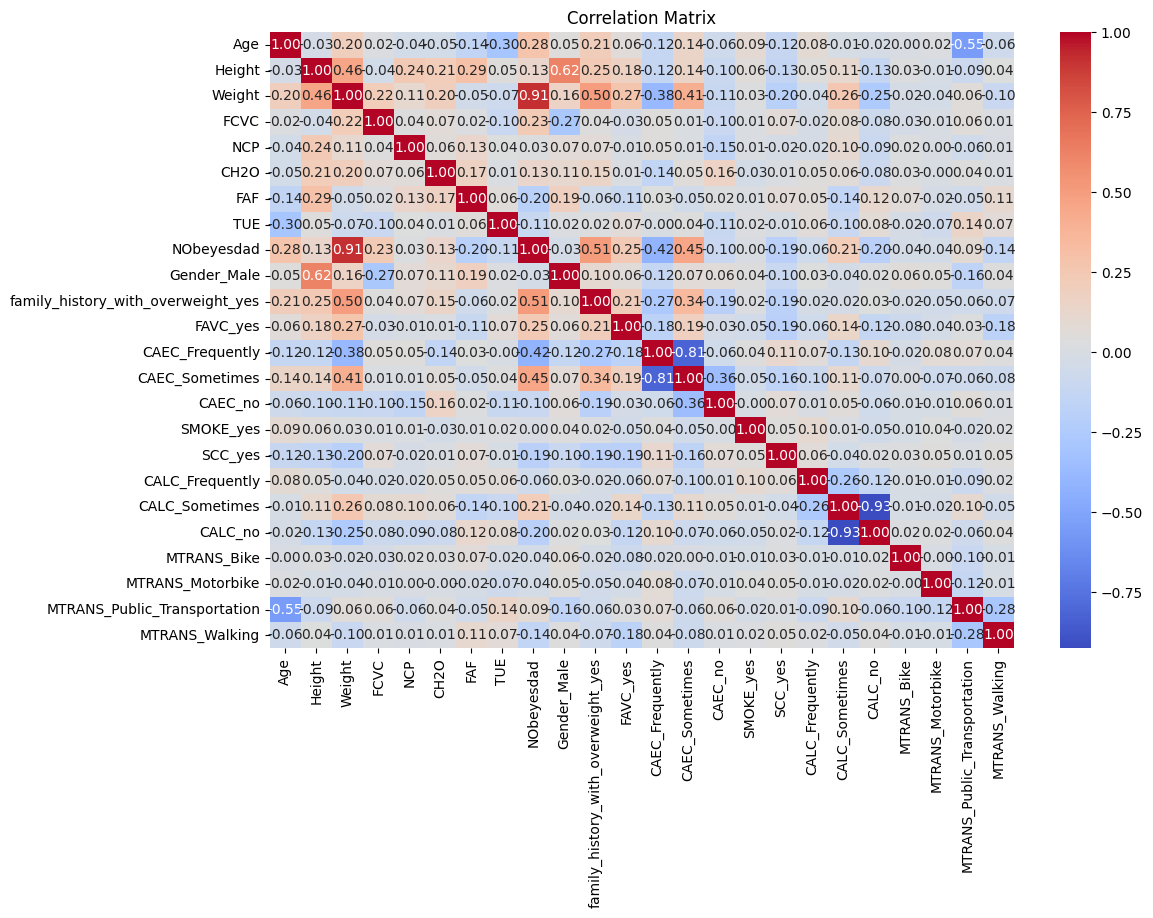

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = obesity_data.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


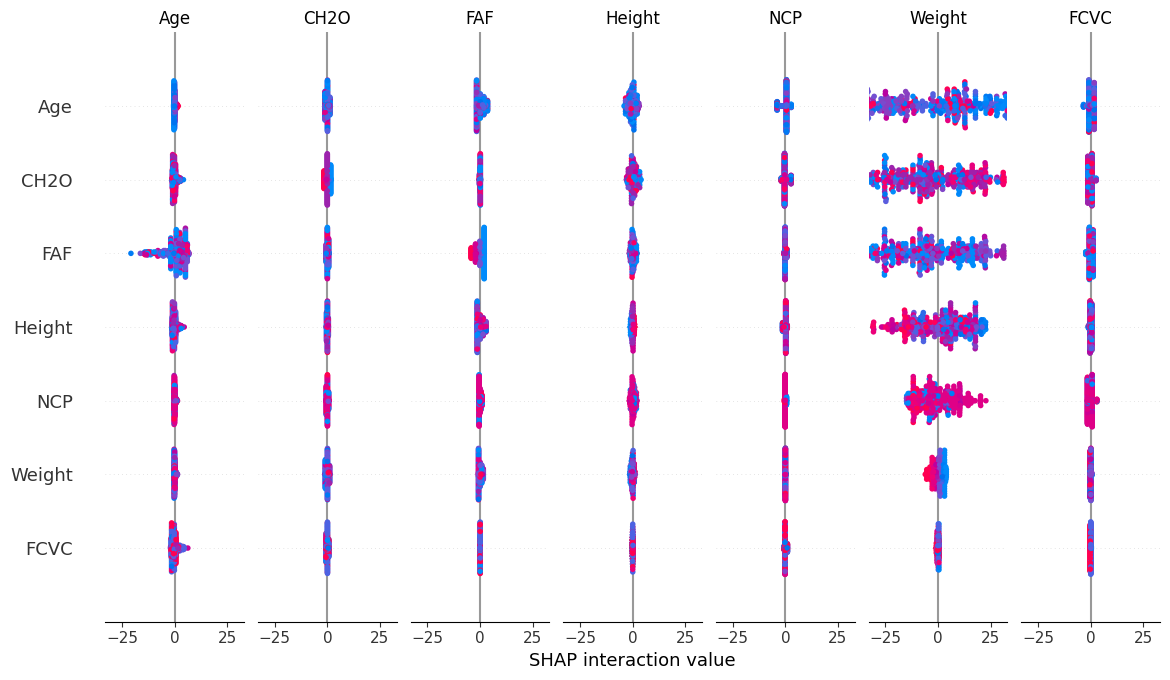

In [ ]:
import shap

# Initialize the explainer with the logistic regression model
explainer = shap.Explainer(log_reg, X_train)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Summarize the SHAP values in a plot (e.g., a summary plot)
shap.summary_plot(shap_values, X_test)


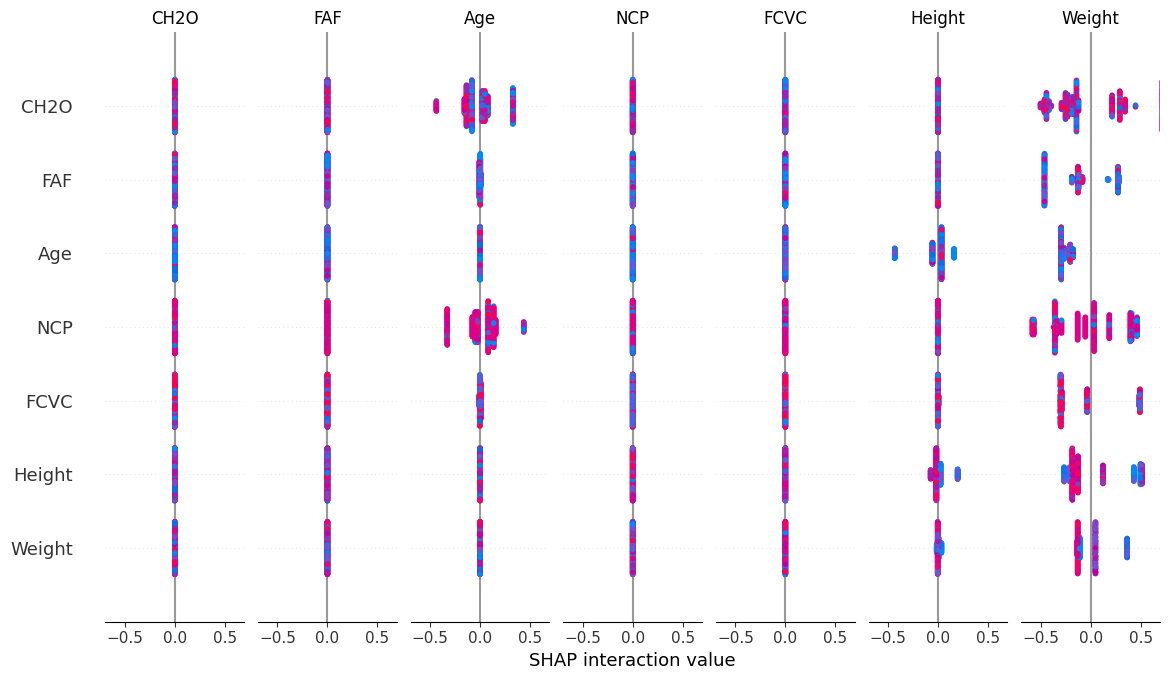

In [ ]:
import shap
import pandas as pd

# Convert X_test into a DataFrame if it's not already in DataFrame format
X_test_df = pd.DataFrame(X_test)

# Initialize the SHAP explainer with the Decision Tree model
explainer = shap.Explainer(dt_clf, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_df)

# Visualize the SHAP values with a summary plot
shap.summary_plot(shap_values, X_test_df)


In [ ]:
automl.explain_row(frame = obesity_data_h2o, row_index = 20, figsize = (8,6), exclude_explanations = "leaderboard")

We can notice that some features have a strong interaction effect, as indicated by the spread of points along the x-axis. For instance, the interaction between Weight,Age,FCVC seems to have a wide spread of SHAP interaction values, suggesting that the combined impact of these two features on the model's output varies significantly across the dataset.

# References

1.⁠ ⁠N. Draper and H. Smith, "Applied Regression Analysis," 3rd ed., Wiley-Interscience, 1998.

2.⁠ ⁠L. Breiman, "Random Forests," Machine Learning, 45(1), 5-32, 2001.

3.⁠ ⁠H2O.ai, "Scalable Machine Learning and Predictive Analytics," H2O.ai documentation, [Online]. Available: https://www.h2o.ai/.

4.⁠ ⁠L. Breiman et al., "Classification and Regression Trees," Wadsworth, 1984.

5.⁠ ⁠S. Lundberg and S. Lee, "A Unified Approach to Interpreting Model Predictions," NIPS, 2017.

6.⁠ ⁠T. Chen and C. Guestrin, "XGBoost: A Scalable Tree Boosting System," KDD, 2016.

7.⁠ ⁠F. Chollet et al., "Keras," GitHub, [Online]. Available: https://github.com/fchollet/keras, 2015.

8.⁠ ⁠M. Abadi et al., "TensorFlow: Large-scale Machine Learning on Heterogeneous Systems," [Online]. Available: https://www.tensorflow.org/, 2015.

# Licence


**MIT License**

Copyright (c) 2024 nikhilgodalla

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.